# Web Scraping com Selenium

## O que é selenium?

Selenium é um conjunto de ferramentas para automatizar navegadores web, disponiveis em java, python, C#, Rubby, javascript, Kotlin.
<p><b>Site:</b> https://www.selenium.dev/</p>

## Cenário Proposto

Você foi contratado por uma concessionaria de veiculos, especializada em venda de carros usados. Você precisa realizar uma previsão do valor futuro dos veiculos é calcular uma taxa de depreciação. Para esse trabalho sera necessario coletar os dados da Tabela FIPE

## O que é a Fipe?
A Fundação Instituto de Pesquisas Econômicas – Fipe é uma organização de direito privado, sem fins lucrativos, criada em 1973. Entre seus objetivos está o apoio a instituições de ensino e pesquisa, públicas ou privadas, em especial o Departamento de Economia da Faculdade de Economia, Administração e Contabilidade da Universidade de São Paulo (FEA-USP). Possui, hoje, destacada atuação nas áreas de ensino, projetos, pesquisa e desenvolvimento de indicadores econômicos e financeiros.

<b> Fonte: <b> https://www.fipe.org.br/pt-br/institucional/sobre-a-fipe/

## Como é Calculdado a tabela FIPE:


### Preço Médio de Veículos
1. A Tabela Fipe expressa preços médios de veículos anunciados pelos vendedores, no mercado nacional, servindo apenas como um parâmetro para negociações ou avaliações. Os preços efetivamente praticados variam em função da região, conservação, cor, acessórios ou qualquer outro fator que possa influenciar as condições de oferta e procura por um veículo específico.

2. O ano do veículo refere-se ao ano do modelo e não são considerados veículos para uso profissional ou especial.

3. Os valores são expressos em R$ (reais) do mês/ano de referência.

<b> Fonte: <b> https://veiculos.fipe.org.br/



## Porque realizar web Scraping?

A Fipe não disponibiliza APi para coleta da informações ou forma de realizar o dowload completo dos dados. Os dados estão disponíveis para consulta apenas no endereço https://veiculos.fipe.org.br/.

## Estruturando o problema

Para realizar a coleta de dados com o selenium precisamos simular todas as ações de um usuário, dentro do site da FIPE. Vamos analisar esses passo a passo, anotandos os dados das ações do usuário.

### Primeiro passo:
    
Selecionar o tipo de consulta realizada, o site nos permite três tipos de consulta:
<p><b>  - Carros e utilitários  </b></p>
<p><b>  - Caminhês e Micro-ônibus  </b></p>
<p><b>  - Motos  </b></p>

Escolheremos a primeira opção: Carros e utilitários 

Copiaremos o nome xPath do campo selecionados. Para isso, vamos clicar com o botão direito do mouse e em seguida vamos clicar em inspecionar.

Obtemos os seguintes resultados:

<b> campo: //*[@id="front"]/div[1]/div[2]/ul/li[1]/a </b>

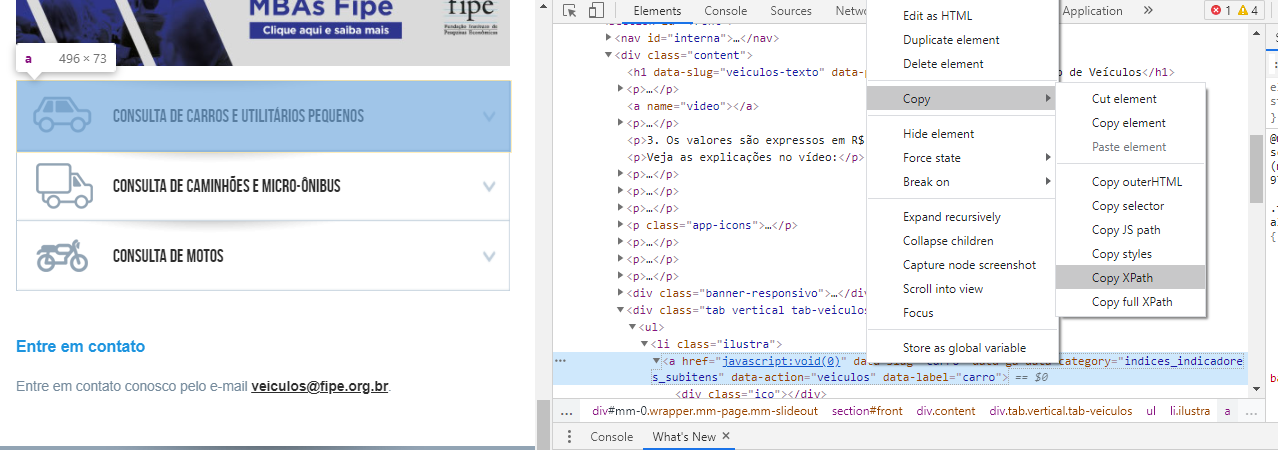

## Segundo passo:

Selecionar qual o Ano de referência do preço e preencher o campo:

Para esses campos precisaremos de duas informações o id da caixa de seleção e local do input do dados:

Vamos fazer o mesmo procedimento anterior. Clicar com o botão direito do mouse no botão desejado e em seguida clicar em inspecionar.

Obtemos os seguintes resultados:

Id da caixa de seleção: <b> selectTabelaReferenciacarro_chosen </b>
<p> <p> xpath campo input: <b>'//*[@id="selectTabelaReferenciacarro_chosen"]/div/div/input' </b></p>


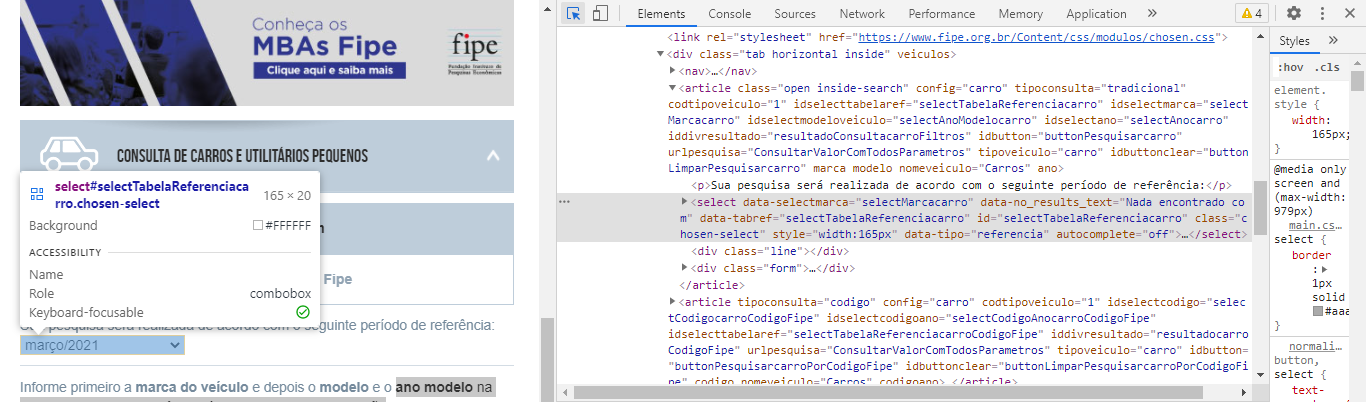

### Lista de opções:

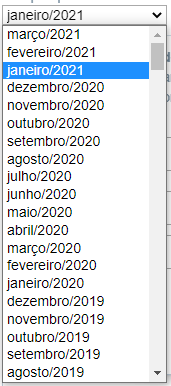

## Terceiro Passo:

### Selecionar qual o marca do veiculo

<p> id campo marca: <b> selectMarcacarro_chosen<b></p>
<p> xpath campo input: <b>'//*[@id="selectMarcacarro_chosen"]/div/div/input' </b></p>



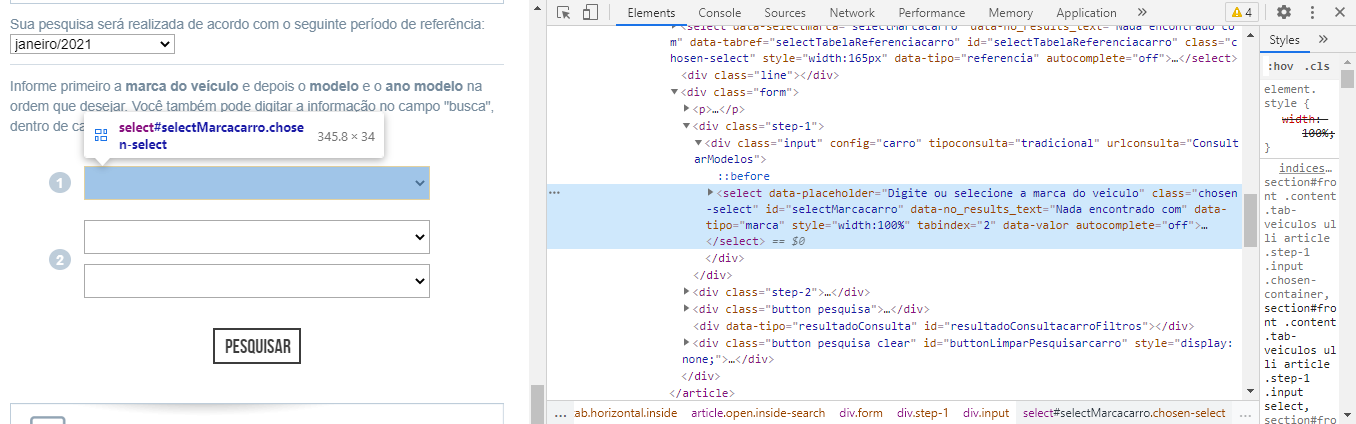

### Lista de Opções:

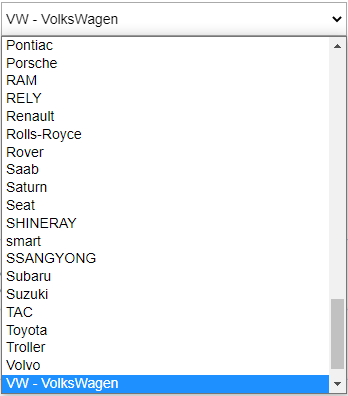

## Quarto Passo:


### Selecionar qual o modelo do veiculo

<p> id campo modelo: <b> selectAnoModelocarro_chosen<b></p>
<p> xpath campo input: <b>'//*[@id="selectAnoModelocarro_chosen"]/div/div/input' </b></p>



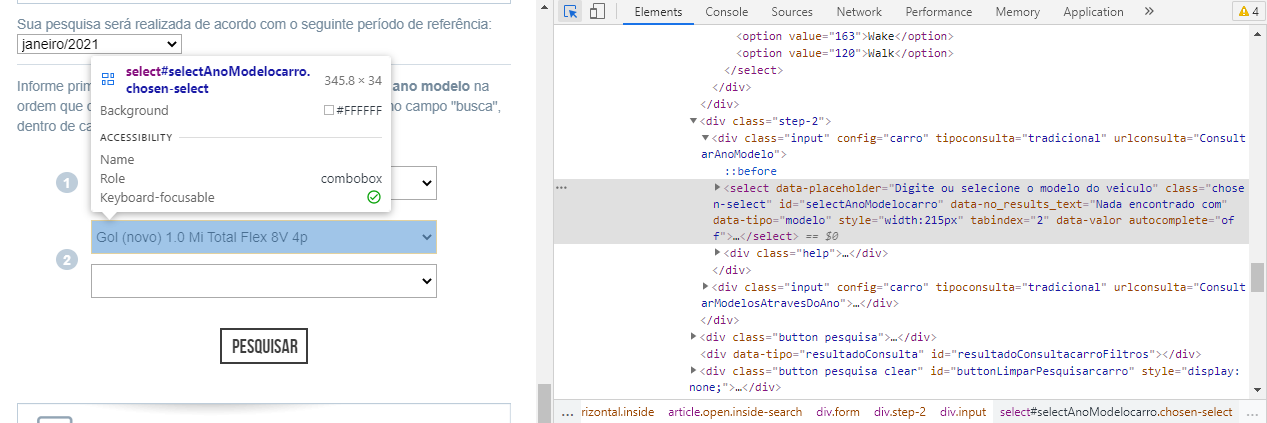

### Lista de opções

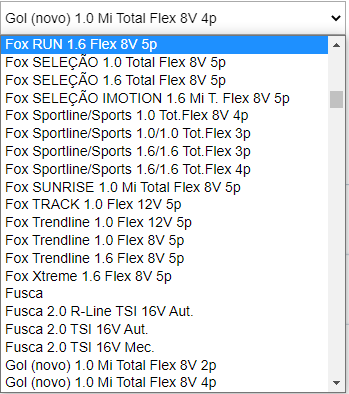

## Quinto Passo:


### Selecionar qual o ano do veiculo

<p> id campo ano: <b> selectAnocarro_chosen<b></p>
<p> xpath campo input: <b>'//*[@id="selectAnocarro_chosen"]/div/div/input' </b></p>



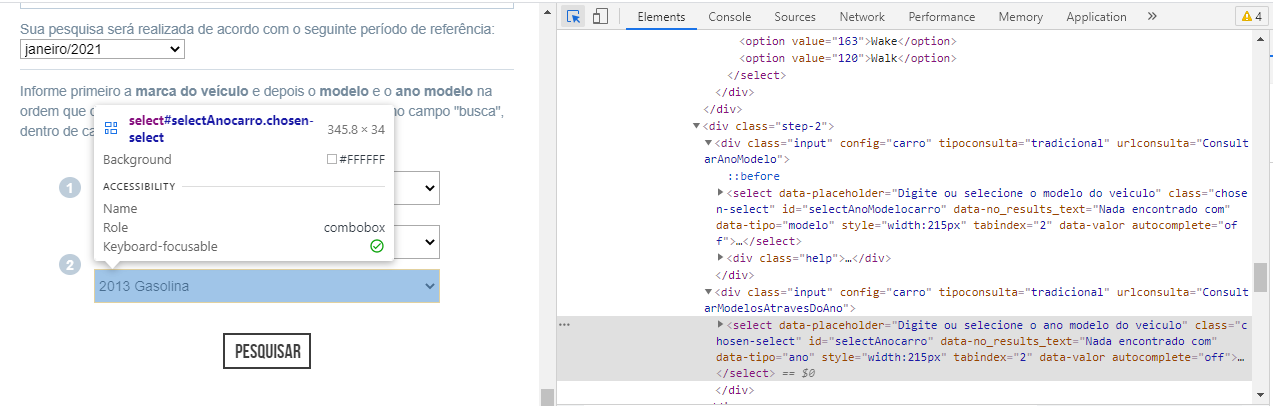

### Lista de opções


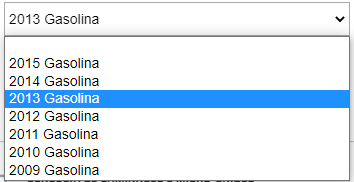

## Sexto Passo:


### Clicar no botão de pesquisar

<p> id do botão de pesquisar: <b> buttonPesquisarcarro<b></p>


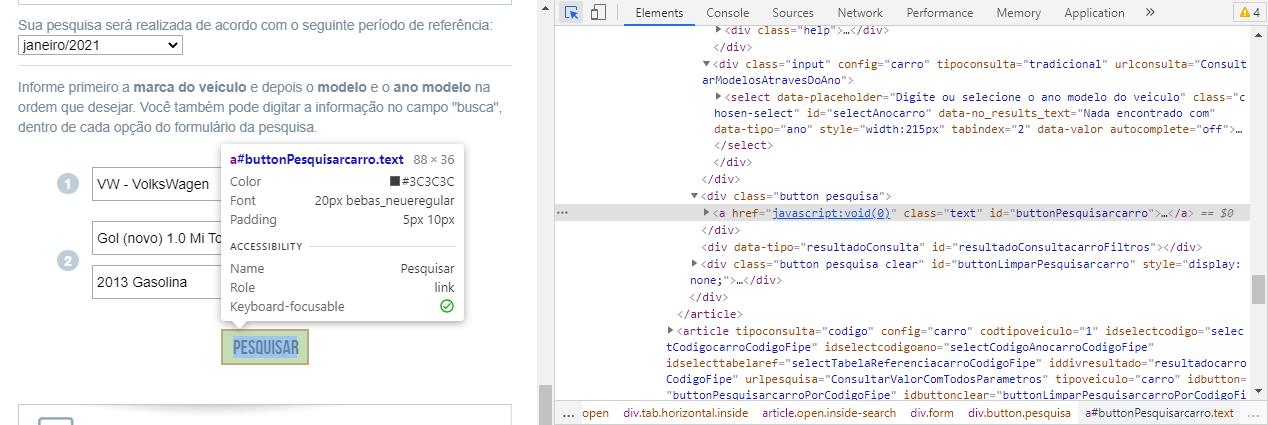

## Setimo Passo:


### Buscar dados na tabela de resultado

<p> id tabela de resultado: <b> selectTabelaReferenciacarro_chosen<b></p>




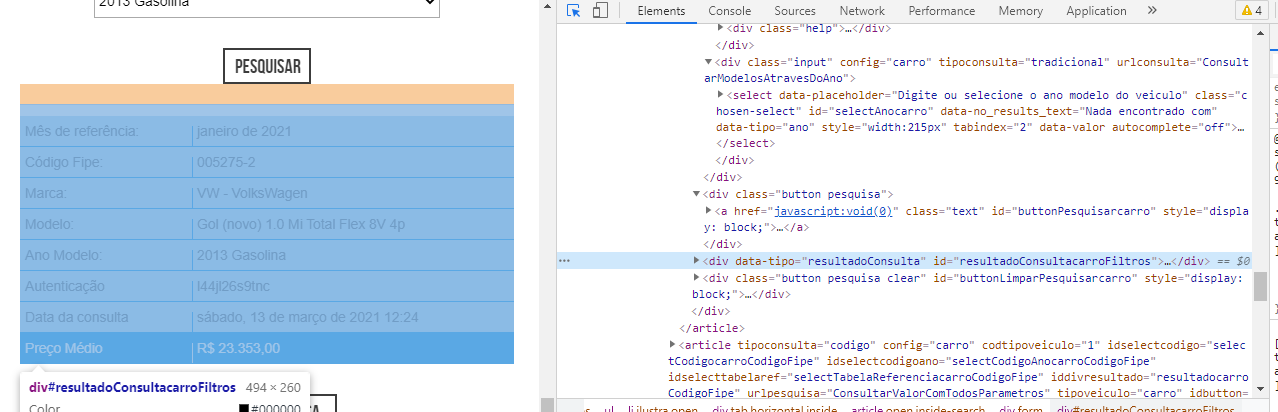

## Oitavo Passo:


### Limpar Resultado

<p> id botão limpar resultado: <b> buttonPesquisarcarro</b></p>



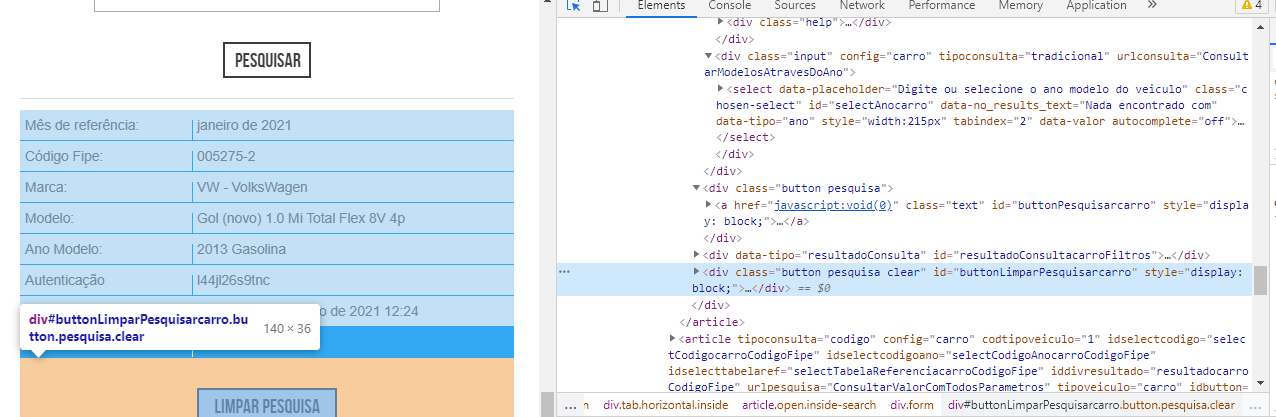

## Web Driver

Agora que já conhecemos os passos necessários para acessar as informação do preços do carros, utilizaramoes o webdriver do selenium para automatizar essa tarefa.

O webdriver exige o dowload compativel com o seu navegador web, nesta tarefa utilizaremos o Google Chrome. Podemos verificar a lista de driver disponiveis em https://www.selenium.dev/documentation/en/webdriver/driver_requirements/

Baixamos compativel com nosso navegador:



Precisamos anotar o local do arquivo baixado. 
'C:\\Driver Selenium\\chromedriver.exe'

## Driveres disponiveis:

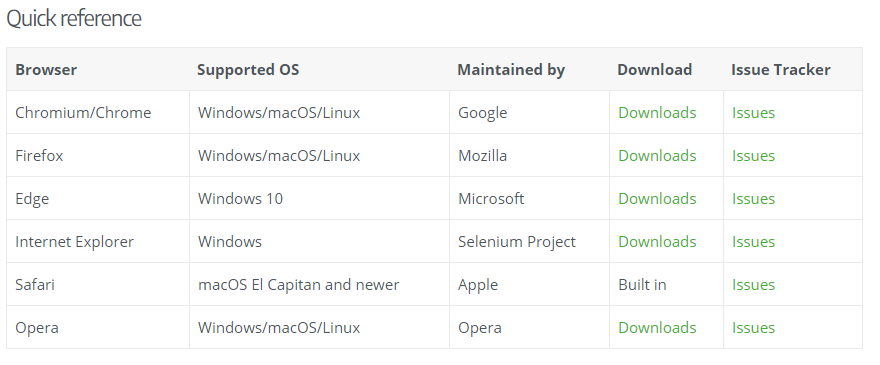

## Preparando Ambiente

Precisamos instalar a versão 3.141.0 selenium em nossa virtualenv

In [ ]:
!pip install selenium==3.141.0

In [ ]:
import selenium


print("Versão utilizada", selenium.__version__)

In [ ]:
# importando o webdriver
from selenium import webdriver

## Atribuindo Valores anotados a variáveis

In [ ]:
# Dados Site

site = 'https://veiculos.fipe.org.br/'

#Tipo consutla
xpath_tipo_consulta = '//*[@id="front"]/div[1]/div[2]/ul/li[1]/a'

#Caixas de seleção
id_marca_carro = 'selectMarcacarro_chosen'
id_modelo_carro = 'selectAnoModelocarro_chosen'
id_ano_carro = 'selectAnocarro_chosen'
id_tabela_referencia = 'selectTabelaReferenciacarro_chosen'

#botoes
id_botao_limpar = 'buttonLimparPesquisarcarro'
id_botao_pesquisa = 'buttonPesquisarcarro'

#resultado da pesquisa
id_resultado_filtros = 'resultadoConsultacarroFiltros'


#informações do carro
ano_veiculo = '2013'
modelo_veiculo = 'Gol (novo) 1.0 Mi Total Flex 8V 4p'
marca_veiculo = "VW - VolksWagen"


#Caminho arquivo Web driver
WEBDRIVER = 'C:\\Driver Selenium\\chromedriver.exe'

## input de informações

Observe que temos um padrão no campo no xpath do campo de input de dados:

'//*[@id="selectMarcacarro_chosen"]/div/div/input'

'//*[@id="selectAnoModelocarro_chosen"]/div/div/input'

'//*[@id="selectAnocarro_chosen"]/div/div/input'

'//*[@id="selectTabelaReferenciacarro_chosen"]/div/div/input'

<p>Podemos criar uma função que gera essa informação, reduzindo o tamanho do nosso código e deixando mais legivel.



In [ ]:
def x_path_input(id_elemento):
    return '//*[@id="{}"]/div/div/input'.format(id_elemento)

## Tempo de resposta do navegador:

Como estamos simulando a ação de um usuário a com o selenium precisamos esperar que a informações sejam redenrizadas no navegador, por esse motivo, a cada execução precisamos esperar que o html seja atualizado.

In [ ]:
#Metodo de esperar de esperar
import random
import time

def esperar(segundos=None):
    """Casos nenhum valor seja atribuido, 
    será atribuido um tempo randomico entre 2 e 8
    (Feito desta forma para simular a ação de um usuário)"""
    if not segundos:
        segundos = random.randrange(2,8)
    time.sleep(segundos)

In [ ]:
# Abrindo o navegador, utilizando o drive do cromio
driver = webdriver.Chrome('C:\\Driver Selenium\\chromedriver.exe')
driver.get(site)
esperar(15) # espera 15 segunos para executar outra interação 

### Navegador é aberto

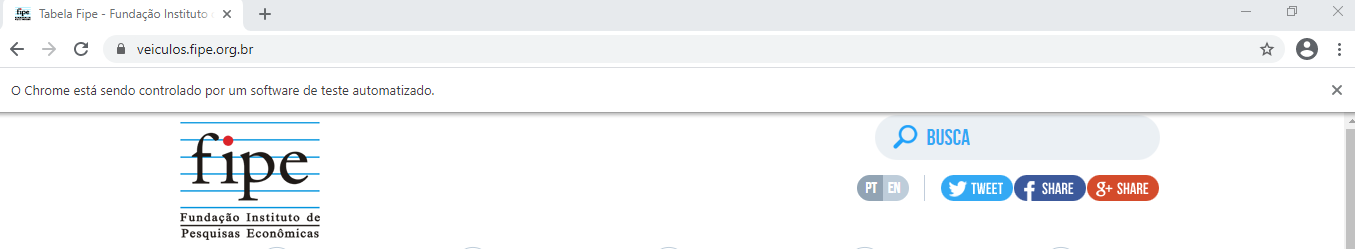

In [ ]:
#Vamos clicar no tipo de consulta escolhido
#Metodo find_element_by_xpath encontra um elemento atravez o xpath
tipo_consulta = driver.find_element_by_xpath(xpath_tipo_consulta)
tipo_consulta.click()

### A ação é executada no navegador

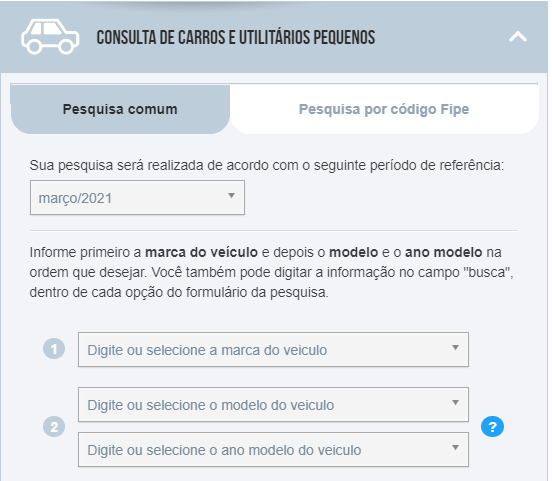

### Agora vamos inserir o período de referência

In [ ]:
# metodo find_element_by_id encontra um elemento atravez do id
pesquisa = driver.find_element_by_id(id_tabela_referencia)
pesquisa.click() 

In [ ]:
# retornamos o elemento de imput e buscamos ele
xpath = x_path_input(id_tabela_referencia)
caixa = driver.find_element_by_xpath(xpath)

In [ ]:
from selenium.webdriver.common.keys import Keys

#utilizamos o mento send_key para inrerir o valor desejado
#importadmos o metodo keys para sismular as ações down e return do teclado (seta para baixo e enter)
caixa.send_keys('fevereiro/2021' + Keys.DOWN + Keys.RETURN)

### Criando função para preencher  item

Como este procedimento será repetido em todas as caixas de seleção, podemos criar uma função.

In [ ]:
def prechence_item(id_elemento, texto_pesquisa):
    pesquisa = driver.find_element_by_id(id_elemento)
    pesquisa.click()
    xpath = x_path_input(id_elemento)
    caixa = driver.find_element_by_xpath(xpath)
    caixa.send_keys(texto_pesquisa + Keys.DOWN + Keys.RETURN)
    pesquisa.is_selecteds = False #retirar seleção
    caixa.is_selecteds = False # retirar seleção

In [ ]:
#resumindo
esperar()
prechence_item(id_tabela_referencia, 'fevereiro/2021')

In [ ]:
#preencher marca
esperar()
prechence_item(id_marca_carro, marca_veiculo)

In [ ]:
#preencher modelo
esperar()
prechence_item(id_modelo_carro, modelo_veiculo)

In [ ]:
#preencher ano
esperar()
prechence_item(id_ano_carro, ano_veiculo)

In [ ]:
#clicando em pesquisar
esperar()
buscar = driver.find_element_by_id(id_botao_pesquisa)
buscar.click()

### Importando a  biblioteca BeautifulSoup para obter resultado da tabela gerada

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

#copiando resultados resultados da tabela

table = driver.find_element_by_id(id_resultado_filtros)
html = table.get_attribute('innerHTML')
parser = BeautifulSoup(html, "html.parser")
table = parser.select_one('tbody')
table

<b>Observe que os valores que procuramos estão entre as tags td e p</b>
<p>Vamor escrever uma expressão regular para buscar esses elementos.</p>

In [ ]:
import re
"""
Caracteres inicial de busca
'<td><p>'

Caracteres finais de bucas
'</p></td>'


#Por fim solicitamos qualquer elemento entres esses dois grupos de caracteres
'.*?'

"""
regex_dados = re.compile('(<td><p>)(.*?)(</p></td>)')


In [ ]:
#Agora informamos onde queremos buscar os dados
dados = regex_dados.findall(str(table))
dados

In [ ]:
#tornamdo mais legivel
for i, dado in enumerate(dados):
    dados[i] = dado[1]
dados

In [ ]:
#criando funcao lista dado
def lista_dado(dados):
    for i, dado in enumerate(dados):
        dados[i] = dado[1]
    return dados

In [ ]:
#bucando titulo
regex_titulo= re.compile('(<td class="noborder"><p>)(.*?)(</p>)')
titulo = regex_titulo.findall(str(table))
titulo = lista_dado(titulo)
titulo

In [ ]:
# limpar pesquisa e fechar navegador
esperar()
buscar = driver.find_element_by_id(id_botao_limpar)
buscar.click()

## Tarefa concluída, porém ...

Concluimos nosso codigo, porém como podemos buscar um grupo maior de informações?

In [ ]:
#buscando informações do da caixa de seleção
referencia_ano = driver.find_element_by_id(id_tabela_referencia)
referencia_ano.click()

In [ ]:
# Extrai todos os dados da tabela de seleção
html_referencia = referencia_ano.get_attribute('innerHTML')

In [ ]:
re_anos = re.compile(r'(" style="">)(.*?)( </li>)')
lista_periodos = re_anos.findall(str(html_referencia))
lista_periodos

In [ ]:
#criando um dicionario de periodos
periodos = []
for periodo in lista_periodos:
    periodo = periodo[1]
    mes, ano =  periodo.split('/')
    periodos.append({'periodo' : periodo, 'mes' : mes, 'ano' : ano})
periodos[0]

In [ ]:
#Criando função de click 
def click_item_id(id_item):
    item = driver.find_element_by_id(id_item)
    item.click()
    item.is_selecteds = False

In [ ]:
#juntando tudo
lista_table = []
for periodo in periodos:
    if int(periodo['ano']) >= 2021:
        periodo_referencia = periodo['periodo']
        print(periodo_referencia)
        esperar()
        click_item_id(id_tabela_referencia)
        esperar()
        prechence_item(id_tabela_referencia, periodo_referencia)
        esperar()
        prechence_item(id_marca_carro, marca_veiculo)
        esperar()
        prechence_item(id_modelo_carro, modelo_veiculo)
        esperar()
        prechence_item(id_ano_carro, ano_veiculo)
        esperar()
        click_item_id(id_botao_pesquisa)
        esperar()
        table = driver.find_element_by_id(id_resultado_filtros)
        html = table.get_attribute('innerHTML')
        parser = BeautifulSoup(html, "html.parser")
        table = parser.select_one('tbody')
        dados = regex_dados.findall(str(table))
        dados = lista_dado(dados)
        lista_table.append(dados)
        click_item_id(id_botao_limpar)

In [ ]:
regex_titulo= re.compile('(<td class="noborder"><p>)(.*?)(</p>)')
titulo = regex_titulo.findall(str(table))
titulo = lista_dado(titulo)
titulo

In [ ]:
#Lendo dados
import pandas as pd

df = pd.DataFrame(lista_table,columns=titulo)

In [ ]:
df

In [ ]:
# Fechando o web browser
driver.quit()

In [ ]:
#Exportando os dados para um arquivo csv
df.to_csv('dados_gol_2021.csv', sep=';', encoding='latin1')